In [ ]:
model.fit(np.array(xs).reshape(-1, 1), ys)

In [ ]:
regression_model.coef_

In [1]:
import numpy as np
a = np.array([True, False, False])
b = np.array([True, True, False])
a & b

array([ True, False, False], dtype=bool)

In [2]:
a and b

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
import numpy as np
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression

xys = [
    (1, 1),
    (2, 2),
    (3, 1),
    (4, 2),
    (8, 1),
]

def get_spline_interpolated_regression_extrapolated_function(xys, default_slope):
    xs, ys = zip(*xys)
    if len(xys) < 2:
        xs = xs[0], xs[0] + 1
        ys = ys[0], ys[0] + default_slope
    middle_function = interp1d(xs, ys, kind='linear')
    # Find intercepts
    regression_model = LinearRegression()
    regression_model.fit(np.array(xs).reshape(-1, 1), ys)
    slope = regression_model.coef_[0]
    x_min, x_max = min(xs), max(xs)
    left_intercept = middle_function(x_min) - slope * x_min
    right_intercept = middle_function(x_max) - slope * x_max
    # Define functions for left, middle, right
    left_function = lambda x: slope * x + left_intercept
    right_function = lambda x: slope * x + right_intercept
    
    def f(x):
        x = np.array(x)
        y = np.zeros(x.shape)
        # Define boolean masks
        x_left = x < x_min
        x_middle = (x_min <= x) & (x <= x_max)
        x_right = x_max < x   
        # Compute y
        y[x_left] = left_function(x[x_left])
        y[x_middle] = middle_function(x[x_middle])
        y[x_right] = right_function(x[x_right])
        return y
    
    return f

f = get_spline_interpolated_regression_extrapolated_function(xys, default_slope=1)
print f(0)
print f(1)
print f(9)

1.04109589041
1.0
0.958904109589


In [ ]:
xs = np.array(xs)

In [ ]:
xs

In [ ]:
ys = np.zeros(xs.shape)
ys

In [ ]:
xs[xs > 2]

In [ ]:
xs[xs > 3] = 1
xs

In [ ]:
x = np.array([1, 2])
x

In [ ]:
x.size

In [ ]:
x = np.array(2)
x.size

In [ ]:
# Vectorize
x = np.array([0, 1, 2, 3, 4, 5])

In [ ]:
x < 2

In [ ]:
x > 4

In [ ]:
f = lambda x: 2 * x + 1

In [ ]:
f(x)

In [ ]:
f(x) * (x < 2)

In [ ]:
f(x) * (x > 4)

In [ ]:
xys = [
    (1, 1),
    (2, 2),
    (3, 1),
    (4, 2),
    (8, 1),
]
xs, ys = zip(*xys)

In [ ]:
xs, ys

In [ ]:
regression_model = LinearRegression()
regression_model.fit(np.array(xs).reshape(-1, 1), ys)

In [ ]:
regression_model.predict(x.reshape(-1, 1))

In [ ]:
x = np.array(1)

In [ ]:
x < 2

In [ ]:
1, 2 + 3

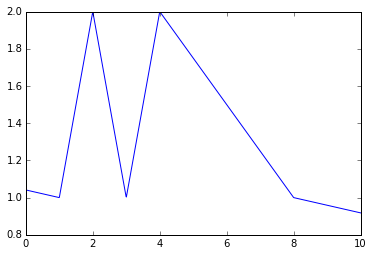

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
xs = np.linspace(0, 10, num=1000, endpoint=True)
ys = f(xs)
plt.plot(xs, ys);

In [ ]:
debug

In [ ]:
f = get_spline_interpolated_regression_extrapolated_function([(0, 0)], default_slope=1)
print f(0)
print f(1)

In [1]:
xs = 1, 2, 3
ys = 4, 5, 6

In [2]:
zip(xs, ys)

[(1, 4), (2, 5), (3, 6)]

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
m = LinearRegression()

In [44]:
m.fit?

In [43]:
import numpy as np
xs = np.array([0, 0])
ys = np.array([0, 1])
m.fit(xs.reshape(-1, 1), ys)

/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [1 2]

In [36]:
xs, ys = zip(*[(0, 1), (1, 0), (2, 2), (3, 1)])

In [38]:
m.fit(np.array(xs).reshape(-1, 1), ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
m.predict(1)

array([ 0.9])

In [41]:
np.array([0]).reshape(-1, 1)

array([[0]])

In [50]:
x = np.array([
    (0, 0),
])
print len(x)
x

1


array([[0, 0]])

In [52]:
x.reshape(1, -1)

array([[0, 0]])

In [53]:
import numpy as np
x = np.array([0, 1, 2])

In [54]:
x + 1

array([1, 2, 3])

In [55]:
x * 2

array([0, 2, 4])

In [56]:
m.intercept_

0.70000000000000007

In [71]:
m.coef_ = np.array([0.2])
print m.predict(0)
print m.predict(1)
m.coef_ = np.array([0.5])
print m.predict(0)
print m.predict(1)

[ 0.]
[ 0.2]
[ 0.]
[ 0.5]


In [62]:
m.fit(np.array([[0]]), [0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
m.coef_

array([ 0.])

In [65]:
x = np.array([[0, 1], [2, 3]])
x

array([[0, 1],
       [2, 3]])

In [67]:
timeit zip(*x)

The slowest run took 6.11 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.61 µs per loop


In [68]:
timeit x[:, 0], x[:, 1]

The slowest run took 11.98 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 577 ns per loop
